<a href="https://colab.research.google.com/github/azrankalo123/Quant_corner/blob/main/PortOpt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import cvxpy as cp
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
all_ticker_list = ['EE.bk', 'GFPT.bk', 'LEE.bk', 'MAX.bk', 'NER.bk', 'PPPM.bk', 'STA.bk', 'TEGH.bk', 'TFM.bk',
                   'TRUBB.bk', 'TWPC.bk', 'UPOIC.bk', 'UVAN.bk', 'VPO.bk', 'AAI.bk', 'APURE.bk', 'ASIAN.bk',
                   'BR.bk', 'BRR.bk', 'BTG.bk', 'CBG.bk', 'CFRESH.bk', 'CH.bk', 'CHOTI.bk', 'CM.bk', 'CPF.bk',
                   'CPI.bk', 'F&D.bk', 'GLOCON.bk', 'HTC.bk', 'ICHI.bk', 'JDF.bk', 'KBS.bk', 'KSL.bk', 'KTIS.bk',
                   'LST.bk', 'M.bk', 'MALEE.bk', 'MINT.bk', 'NRF.bk', 'NSL.bk', 'OISHI.bk', 'OSP.bk', 'PB.bk',
                   'PLUS.bk', 'PM.bk', 'PRG.bk', 'RBF.bk', 'SAPPE.bk', 'SAUCE.bk', 'SFP.bk', 'SNNP.bk', 'SNP.bk',
                   'SORKON.bk', 'SSC.bk', 'SSF.bk', 'SST.bk', 'SUN.bk', 'TC.bk', 'TFG.bk', 'TFMAMA.bk', 'TIPCO.bk',
                   'TKN.bk', 'TU.bk', 'TVO.bk', 'W.bk', 'ZEN.bk', 'AFC.bk', 'BTNC.bk', 'CPH.bk', 'CPL.bk', 'NC.bk',
                   'PAF.bk', 'PDJ.bk', 'PG.bk', 'SABINA.bk', 'SAWANG.bk', 'SUC.bk', 'TNL.bk', 'TR.bk', 'TTI.bk',
                   'TTT.bk', 'UPF.bk', 'WACOAL.bk', 'WFX.bk', 'AJA.bk', 'DTCI.bk', 'FANCY.bk', 'FTI.bk', 'KYE.bk',
                   'L&E.bk', 'MODERN.bk', 'OGC.bk', 'ROCK.bk', 'SIAM.bk', 'TCMC.bk', 'TSR.bk', 'APCO.bk', 'BIZ.bk',
                   'DDD.bk', 'JCT.bk', 'KISS.bk', 'NV.bk', 'OCC.bk', 'S&J.bk', 'STGT.bk', 'STHAI.bk', 'TNR.bk',
                   'TOG.bk', 'BAY.bk', 'BBL.bk', 'CIMBT.bk', 'KBANK.bk', 'KKP.bk', 'KTB.bk', 'LHFG.bk', 'SCB.bk',
                   'TCAP.bk', 'TISCO.bk', 'TTB.bk', 'AEONTS.bk', 'AMANAH.bk', 'ASAP.bk', 'ASK.bk', 'ASP.bk', 'BAM.bk',
                   'BYD.bk', 'CGH.bk', 'CHAYO.bk', 'ECL.bk', 'FNS.bk', 'FSS.bk', 'GBX.bk', 'GL.bk', 'HENG.bk', 'IFS.bk',
                   'JMT.bk', 'KCAR.bk', 'KGI.bk', 'KTC.bk', 'MFC.bk', 'MICRO.bk', 'ML.bk', 'MST.bk', 'MTC.bk', 'NCAP.bk',
                   'PL.bk', 'S11.bk', 'SAK.bk', 'SAWAD.bk', 'SCAP.bk', 'TH.bk', 'THANI.bk', 'TIDLOR.bk', 'TK.bk', 'TNITY.bk',
                   'UOBKH.bk', 'XPG.bk', 'AYUD.bk', 'BKI.bk', 'BLA.bk', 'BUI.bk', 'CHARAN.bk', 'INSURE.bk', 'KWI.bk', 'MTI.bk',
                   'NKI.bk', 'NSI.bk', 'SMK.bk', 'TGH.bk', 'THRE.bk', 'THREL.bk', 'TIPH.bk', 'TLI.bk', 'TQM.bk', 'TSI.bk', 'TVI.bk',
                   '3K-BAT.bk', 'ACG.bk', 'AH.bk', 'CWT.bk', 'EASON.bk', 'GYT.bk', 'HFT.bk', 'IHL.bk', 'INGRS.bk', 'IRC.bk',
                   'PCSGH.bk', 'POLY.bk', 'SAT.bk', 'SPG.bk', 'STANLY.bk', 'TKT.bk', 'TNPC.bk', 'TRU.bk', 'TSC.bk', 'ALLA.bk',
                   'ASEFA.bk', 'CPT.bk', 'CRANE.bk', 'CTW.bk', 'FMT.bk', 'HTECH.bk', 'KKC.bk', 'PK.bk', 'SNC.bk', 'STARK.bk',
                   'TCJ.bk', 'TPCS.bk', 'VARO.bk', 'UTP.bk', 'BCT.bk', 'CMAN.bk', 'GC.bk', 'GGC.bk', 'GIFT.bk', 'IVL.bk',
                   'NFC.bk', 'PATO.bk', 'PMTA.bk', 'PTTGC.bk', 'SUTHA.bk', 'TCCC.bk', 'TPA.bk', 'UAC.bk', 'UP.bk', 'AJ.bk',
                   'ALUCON.bk', 'BGC.bk', 'CSC.bk', 'NEP.bk', 'PTL.bk', 'SCGP.bk', 'SFLEX.bk', 'SITHAI.bk', 'SLP.bk', 'SMPC.bk',
                   'SPACK.bk', 'TCOAT.bk', 'TFI.bk', 'THIP.bk', 'TMD.bk', 'TOPP.bk', 'TPAC.bk', 'TPBI.bk', 'TPP.bk', '2S.bk',
                   'AMC.bk', 'BSBM.bk', 'CEN.bk', 'CITY.bk', 'CSP.bk', 'GJS.bk', 'GSTEEL.bk', 'INOX.bk', 'LHK.bk', 'MCS.bk',
                   'MILL.bk', 'PAP.bk', 'PERM.bk', 'SAM.bk', 'SMIT.bk', 'SSSC.bk', 'TGPRO.bk', 'THE.bk', 'TMT.bk', 'TSTH.bk',
                   'TWP.bk', 'TYCN.bk', 'CCP.bk', 'COTTO.bk', 'DCC.bk', 'DCON.bk', 'DRT.bk', 'EPG.bk', 'GEL.bk', 'PPP.bk',
                   'Q-CON.bk', 'SCC.bk', 'SCCC.bk', 'SCP.bk', 'SKN.bk', 'STECH.bk', 'TASCO.bk', 'TOA.bk', 'TPIPL.bk', 'UMI.bk',
                   'VNG.bk', 'WIIK.bk', 'A.bk', 'AMATA.bk', 'AMATAV.bk', 'ANAN.bk', 'AP.bk', 'APEX.bk', 'AQ.bk', 'ASW.bk',
                   'AWC.bk', 'BLAND.bk', 'BRI.bk', 'BROCK.bk', 'CGD.bk', 'CI.bk', 'CMC.bk', 'CPN.bk', 'ESTAR.bk', 'EVER.bk',
                   'FPT.bk', 'GLAND.bk', 'J.bk', 'JCK.bk', 'KC.bk', 'LALIN.bk', 'LH.bk', 'LPN.bk', 'MBK.bk', 'MJD.bk', 'MK.bk',
                   'NCH.bk', 'NNCL.bk', 'NOBLE.bk', 'NUSA.bk', 'NVD.bk', 'ORI.bk', 'PACE.bk', 'PEACE.bk', 'PF.bk', 'PIN.bk',
                   'PLAT.bk', 'POLAR.bk', 'PRECHA.bk', 'PRIN.bk', 'PSH.bk', 'QH.bk', 'RICHY.bk', 'RML.bk', 'ROJNA.bk', 'S.bk',
                   'SA.bk', 'SAMCO.bk', 'SC.bk', 'SENA.bk', 'SIRI.bk', 'SPALI.bk', 'U.bk', 'UV.bk', 'WHA.bk', 'WIN.bk', 'AIMCG.bk',
                   'AIMIRT.bk', 'ALLY.bk', 'AMATAR.bk', 'B-WORK.bk', 'BAREIT.bk', 'BKKCP.bk', 'BOFFICE.bk', 'CPNCG.bk', 'CPNREIT.bk',
                   'CPTGF.bk', 'CTARAF.bk', 'DREIT.bk', 'ERWPF.bk', 'FTREIT.bk', 'FUTUREPF.bk', 'GAHREIT.bk', 'GROREIT.bk', 'GVREIT.bk',
                   'HPF.bk', 'IMPACT.bk', 'INETREIT.bk', 'KPNPF.bk', 'KTBSTMR.bk', 'LHHOTEL.bk', 'LHPF.bk', 'LHSC.bk', 'LPF.bk',
                   'LUXF.bk', 'M-II.bk', 'M-PAT.bk', 'M-STOR.bk', 'MIPF.bk', 'MIT.bk', 'MJLF.bk', 'MNIT.bk', 'MNIT2.bk', 'MNRF.bk',
                   'POPF.bk', 'PPF.bk', 'PROSPECT.bk', 'QHHR.bk', 'QHOP.bk', 'QHPF.bk', 'SHREIT.bk', 'SIRIP.bk', 'SPRIME.bk',
                   'SRIPANWA.bk', 'SSPF.bk', 'SSTRT.bk', 'TIF1.bk', 'TLHPF.bk', 'TNPF.bk', 'TPRIME.bk', 'TTLPF.bk', 'TU-PF.bk',
                   'URBNPF.bk', 'WHABT.bk', 'WHAIR.bk', 'WHART.bk', 'APCS.bk', 'BJCHI.bk', 'BKD.bk', 'CIVIL.bk', 'CK.bk', 'CNT.bk',
                   'EMC.bk', 'ITD.bk', 'NWR.bk', 'PLE.bk', 'PREB.bk', 'PYLON.bk', 'RT.bk', 'SEAFCO.bk', 'SQ.bk', 'SRICHA.bk', 'STEC.bk',
                   'STI.bk', 'STPI.bk', 'SYNTEC.bk', 'TEAMG.bk', 'TEKA.bk', 'TPOLY.bk', 'TRC.bk', 'TRITN.bk', 'TTCL.bk', 'UNIQ.bk',
                   'WGE.bk', '7UP.bk', 'ABPIF.bk', 'ACC.bk', 'ACE.bk', 'AGE.bk', 'AI.bk', 'AIE.bk', 'AKR.bk', 'BAFS.bk', 'BANPU.bk',
                   'BBGI.bk', 'BCP.bk', 'BCPG.bk', 'BGRIM.bk', 'BPP.bk', 'BRRGIF.bk', 'CKP.bk', 'CV.bk', 'DEMCO.bk', 'EA.bk', 'EASTW.bk',
                   'EGATIF.bk', 'EGCO.bk', 'EP.bk', 'ESSO.bk', 'ETC.bk', 'GPSC.bk', 'GREEN.bk', 'GULF.bk', 'GUNKUL.bk', 'IFEC.bk', 'IRPC.bk',
                   'JR.bk', 'KBSPIF.bk', 'LANNA.bk', 'MDX.bk', 'NOVA.bk', 'OR.bk', 'PCC.bk', 'PRIME.bk', 'PTG.bk', 'PTT.bk', 'PTTEP.bk',
                   'QTC.bk', 'RATCH.bk', 'RPC.bk', 'SCG.bk', 'SCI.bk', 'SCN.bk', 'SGP.bk', 'SKE.bk', 'SOLAR.bk', 'SPCG.bk', 'SPRC.bk',
                   'SSP.bk', 'SUPER.bk', 'SUPEREIF.bk', 'SUSCO.bk', 'TAE.bk', 'TCC.bk', 'TGE.bk', 'TOP.bk', 'TPIPP.bk', 'TSE.bk', 'TTW.bk',
                   'UBE.bk', 'WHAUP.bk', 'WP.bk', 'THL.bk', 'B52.bk', 'BEAUTY.bk', 'BIG.bk', 'BJC.bk', 'COM7.bk', 'CPALL.bk', 'CPW.bk',
                   'CRC.bk', 'CSS.bk', 'DOHOME.bk', 'FN.bk', 'FTE.bk', 'GLOBAL.bk', 'HMPRO.bk', 'ICC.bk', 'ILM.bk', 'IT.bk', 'KAMART.bk',
                   'LOXLEY.bk', 'MAKRO.bk', 'MC.bk', 'MEGA.bk', 'MIDA.bk', 'RS.bk', 'RSP.bk', 'SABUY.bk', 'SCM.bk', 'SINGER.bk', 'SPC.bk',
                   'SPI.bk', 'SVT.bk', 'AHC.bk', 'BCH.bk', 'BDMS.bk', 'BH.bk', 'CHG.bk', 'CMR.bk', 'EKH.bk', 'KDH.bk', 'LPH.bk', 'M-CHAI.bk',
                   'NEW.bk', 'NTV.bk', 'PR9.bk', 'PRINC.bk', 'RAM.bk', 'RJH.bk', 'RPH.bk', 'SKR.bk', 'SVH.bk', 'THG.bk', 'VIBHA.bk', 'VIH.bk',
                   'WPH.bk', 'AMARIN.bk', 'AQUA.bk', 'AS.bk', 'BEC.bk', 'FE.bk', 'GPI.bk', 'GRAMMY.bk', 'JKN.bk', 'MACO.bk', 'MAJOR.bk',
                   'MATCH.bk', 'MATI.bk', 'MCOT.bk', 'MONO.bk', 'MPIC.bk', 'NATION.bk', 'ONEE.bk', 'PLANB.bk', 'POST.bk', 'PRAKIT.bk',
                   'PTECH.bk', 'SE-ED.bk', 'TKS.bk', 'VGI.bk', 'WAVE.bk', 'WORK.bk', 'BWG.bk', 'GENCO.bk', 'PRO.bk', 'SISB.bk', 'SO.bk',
                   'ASIA.bk', 'BEYOND.bk', 'CENTEL.bk', 'CSR.bk', 'DUSIT.bk', 'ERW.bk', 'GRAND.bk', 'LRH.bk', 'MANRIN.bk', 'OHTL.bk',
                   'ROH.bk', 'SHANG.bk', 'SHR.bk', 'VRANDA.bk', 'AAV.bk', 'AOT.bk', 'ASIMAR.bk', 'B.bk', 'BA.bk', 'BEM.bk', 'BIOTEC.bk',
                   'BTS.bk', 'BTSGIF.bk', 'DMT.bk', 'III.bk', 'JWD.bk', 'KEX.bk', 'KIAT.bk', 'KWC.bk', 'MENA.bk', 'NOK.bk', 'NYT.bk',
                   'PORT.bk', 'PRM.bk', 'PSL.bk', 'RCL.bk', 'TFFIF.bk', 'THAI.bk', 'TSTE.bk', 'TTA.bk', 'WICE.bk', 'CCET.bk', 'DELTA.bk',
                   'HANA.bk', 'KCE.bk', 'METCO.bk', 'NEX.bk', 'SMT.bk', 'SVI.bk', 'TEAM.bk', 'ADVANC.bk', 'AIT.bk', 'ALT.bk', 'AMR.bk',
                   'BLISS.bk', 'DIF.bk', 'DTAC.bk', 'FORTH.bk', 'HUMAN.bk', 'ILINK.bk', 'INET.bk', 'INSET.bk', 'INTUCH.bk', 'ITEL.bk',
                   'JAS.bk', 'JASIF.bk', 'JMART.bk', 'JTS.bk', 'MFEC.bk', 'MSC.bk', 'PT.bk', 'SAMART.bk', 'SAMTEL.bk', 'SDC.bk', 'SIS.bk',
                   'SKY.bk', 'SVOA.bk', 'SYMC.bk', 'SYNEX.bk', 'THCOM.bk', 'TKC.bk', 'TRUE.bk', 'TWZ.bk']

In [ ]:
thai_tick=['DELTA.bk','PTT.bk','AOT.bk','ADVANC.bk','PTTEP.bk','GULF.bk','CPALL.bk','BDMS.bk','SCC.bk','BBL.bk','KBANK.bk','CPN.bk']

###Prepare Data

In [ ]:
thai_df = yf.download(thai_tick, start="2018-01-01", end="2023-01-31",interval='1d')

[*********************100%%**********************]  12 of 12 completed


In [ ]:
thai_df['Adj Close'].count()

ADVANC.BK    1214
AOT.BK       1214
BBL.BK       1214
BDMS.BK      1214
CPALL.BK     1214
CPN.BK       1214
DELTA.BK     1214
GULF.BK      1214
KBANK.BK     1214
PTT.BK       1214
PTTEP.BK     1214
SCC.BK       1214
dtype: int64

In [ ]:
thai_df['Adj Close'].head()

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
Date,,,,,,,,,,,,
2018-01-03,157.596375,67.769714,168.147385,18.525187,71.044029,75.832916,6.611997,12.849349,201.644440,34.429062,77.030174,396.270782
2018-01-04,155.591339,67.769714,168.147385,18.613401,71.044029,75.167725,6.678785,12.942799,205.898514,36.112263,80.445320,401.123108
2018-01-05,156.393326,69.211617,168.967621,18.436968,70.365273,73.837311,6.723311,12.849349,205.047745,35.806225,81.204239,396.270782
2018-01-08,157.195374,71.374489,169.787857,18.525187,69.234001,72.728645,6.812361,12.755900,205.047745,35.653210,80.065857,397.888245
2018-01-09,155.992355,70.413216,170.608109,18.525187,69.007744,72.506920,6.879149,12.709173,199.942795,35.653210,81.204239,401.123108


In [ ]:
crypto_tick = [
    "BTC-USD",  # Bitcoin
    "ETH-USD",  # Ethereum
    "BNB-USD",  # BNB
    "XRP-USD",  # XRP
    "ADA-USD",  # Cardano
    "DOGE-USD", # Dogecoin
    "LINK-USD", # Chainlink
    "LTC-USD",  # Litecoin
    "BCH-USD",  # Bitcoin Cash
]

In [ ]:
crypto_df = yf.download(crypto_tick, start="2018-01-01", end="2022-12-31",interval='1d')

[*********************100%%**********************]  9 of 9 completed


In [ ]:
crypto_df['Adj Close'].count()

ADA-USD     1825
BCH-USD     1825
BNB-USD     1825
BTC-USD     1825
DOGE-USD    1825
ETH-USD     1825
LINK-USD    1825
LTC-USD     1825
XRP-USD     1825
dtype: int64

In [ ]:
crypto_df['Adj Close']

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LINK-USD,LTC-USD,XRP-USD
Date,,,,,,,,,
2018-01-01,0.728657,2432.540039,8.414610,13657.200195,0.008909,772.640991,0.733563,229.033005,2.391030
2018-01-02,0.782587,2711.000000,8.837770,14982.099609,0.009145,884.443970,0.673712,255.684006,2.480900
2018-01-03,1.079660,2608.689941,9.535880,15201.000000,0.009320,962.719971,0.681167,245.367996,3.105370
2018-01-04,1.114120,2430.179932,9.213990,15599.200195,0.009644,980.921997,0.984368,241.369995,3.196630
2018-01-05,0.999559,2584.479980,14.917200,17429.500000,0.012167,997.719971,0.907486,249.270996,3.048710
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.265297,103.384392,244.198288,16919.804688,0.075783,1226.974365,6.037669,70.684746,0.365723
2022-12-27,0.260370,101.691376,246.596680,16717.173828,0.073724,1212.791626,5.899226,68.747910,0.368126
2022-12-28,0.248378,99.176765,244.141922,16552.572266,0.070381,1189.986084,5.676936,66.339066,0.356531


### Optimize Thai Stock

In [ ]:
np.log(thai_df['Adj Close']) - np.log(thai_df['Adj Close'].shift(1))

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
Date,,,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,-0.012804,0.000000,0.000000,0.004751,0.000000,-0.008811,0.010050,0.007246,0.020877,0.047731,0.043380,0.012171
2018-01-05,0.005141,0.021053,0.004866,-0.009524,-0.009600,-0.017858,0.006645,-0.007246,-0.004141,-0.008511,0.009390,-0.012171
2018-01-08,0.005115,0.030772,0.004843,0.004773,-0.016208,-0.015129,0.013158,-0.007299,0.000000,-0.004283,-0.014118,0.004073
2018-01-09,-0.007682,-0.013560,0.004819,0.000000,-0.003273,-0.003053,0.009756,-0.003670,-0.025212,0.000000,0.014118,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.010471,0.010222,0.000000,-0.008811,0.000000,0.000000,0.016807,0.009346,0.003466,0.023531,0.014472,0.002989
2022-12-27,0.007782,0.023452,0.006849,0.008811,0.026170,0.021277,-0.005571,0.009259,0.006897,0.007722,0.005731,0.014815
2022-12-28,0.002581,0.000000,0.003407,0.017392,-0.003697,0.010471,-0.016902,0.000000,0.003431,0.007663,0.000000,0.002937


In [ ]:
R_t = pd.DataFrame(np.log(thai_df['Adj Close']) - np.log(thai_df['Adj Close'].shift(1)), columns = thai_df['Adj Close'].columns.tolist(), index = thai_df['Adj Close'].index.tolist()[1:])

In [ ]:
# @title Default title text
R_t

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
2018-01-04,-0.012804,0.000000,0.000000,0.004751,0.000000,-0.008811,0.010050,0.007246,0.020877,0.047731,0.043380,0.012171
2018-01-05,0.005141,0.021053,0.004866,-0.009524,-0.009600,-0.017858,0.006645,-0.007246,-0.004141,-0.008511,0.009390,-0.012171
2018-01-08,0.005115,0.030772,0.004843,0.004773,-0.016208,-0.015129,0.013158,-0.007299,0.000000,-0.004283,-0.014118,0.004073
2018-01-09,-0.007682,-0.013560,0.004819,0.000000,-0.003273,-0.003053,0.009756,-0.003670,-0.025212,0.000000,0.014118,0.008097
2018-01-10,-0.002574,-0.027683,-0.009662,0.004751,0.016260,0.003053,-0.029559,0.025410,-0.008547,0.008547,0.000000,0.016000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.010471,0.010222,0.000000,-0.008811,0.000000,0.000000,0.016807,0.009346,0.003466,0.023531,0.014472,0.002989
2022-12-27,0.007782,0.023452,0.006849,0.008811,0.026170,0.021277,-0.005571,0.009259,0.006897,0.007722,0.005731,0.014815
2022-12-28,0.002581,0.000000,0.003407,0.017392,-0.003697,0.010471,-0.016902,0.000000,0.003431,0.007663,0.000000,0.002937
2022-12-29,0.010257,0.009885,0.003396,0.025533,0.011050,0.006920,0.025247,0.022780,0.006826,0.000000,0.005698,0.008759


In [ ]:
# @title Default title text
S_t_plus_1 =thai_df['Adj Close'].drop(thai_df['Adj Close'].index[0])
S_t_plus_1

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
Date,,,,,,,,,,,,
2018-01-04,155.591339,67.769714,168.147385,18.613401,71.044029,75.167725,6.678785,12.942799,205.898514,36.112263,80.445320,401.123108
2018-01-05,156.393326,69.211617,168.967621,18.436968,70.365273,73.837311,6.723311,12.849349,205.047745,35.806225,81.204239,396.270782
2018-01-08,157.195374,71.374489,169.787857,18.525187,69.234001,72.728645,6.812361,12.755900,205.047745,35.653210,80.065857,397.888245
2018-01-09,155.992355,70.413216,170.608109,18.525187,69.007744,72.506920,6.879149,12.709173,199.942795,35.653210,81.204239,401.123108
2018-01-10,155.591339,68.490669,168.967621,18.613401,70.139015,72.728645,6.678785,13.036248,198.241165,35.959240,81.204239,407.592804
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,184.749008,73.307503,141.036514,27.591009,65.235519,68.539246,71.692307,53.135712,140.231323,30.768049,164.407455,330.264282
2022-12-27,186.192368,75.047005,142.005844,27.835178,66.965248,70.013206,71.294014,53.629997,141.201782,31.006561,165.352325,335.193604
2022-12-28,186.673477,75.047005,142.490509,28.323515,66.718147,70.750191,70.099144,53.629997,141.687012,31.245073,165.352325,336.179474


In [ ]:
# @title Default title text
S_t = thai_df['Adj Close'].drop(thai_df['Adj Close'].index[-1])
S_t

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
Date,,,,,,,,,,,,
2018-01-03,157.596375,67.769714,168.147385,18.525187,71.044029,75.832916,6.611997,12.849349,201.644440,34.429062,77.030174,396.270782
2018-01-04,155.591339,67.769714,168.147385,18.613401,71.044029,75.167725,6.678785,12.942799,205.898514,36.112263,80.445320,401.123108
2018-01-05,156.393326,69.211617,168.967621,18.436968,70.365273,73.837311,6.723311,12.849349,205.047745,35.806225,81.204239,396.270782
2018-01-08,157.195374,71.374489,169.787857,18.525187,69.234001,72.728645,6.812361,12.755900,205.047745,35.653210,80.065857,397.888245
2018-01-09,155.992355,70.413216,170.608109,18.525187,69.007744,72.506920,6.879149,12.709173,199.942795,35.653210,81.204239,401.123108
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,182.824539,72.562004,141.036514,27.835178,65.235519,68.539246,70.497437,52.641426,139.746094,30.052513,162.045288,329.278442
2022-12-26,184.749008,73.307503,141.036514,27.591009,65.235519,68.539246,71.692307,53.135712,140.231323,30.768049,164.407455,330.264282
2022-12-27,186.192368,75.047005,142.005844,27.835178,66.965248,70.013206,71.294014,53.629997,141.201782,31.006561,165.352325,335.193604


In [ ]:
#calculate the log return as defined
R_t = pd.DataFrame(np.log(S_t_plus_1.values/S_t.values), columns = thai_df['Adj Close'].columns.tolist(), index = thai_df['Adj Close'].index.tolist()[1:])[:'2021']
R_t

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,CPALL.BK,CPN.BK,DELTA.BK,GULF.BK,KBANK.BK,PTT.BK,PTTEP.BK,SCC.BK
2018-01-04,-0.012804,0.000000,0.000000,0.004751,0.000000,-0.008811,0.010050,0.007246,0.020877,0.047731,0.043380,0.012171
2018-01-05,0.005141,0.021053,0.004866,-0.009524,-0.009600,-0.017858,0.006645,-0.007246,-0.004141,-0.008511,0.009390,-0.012171
2018-01-08,0.005115,0.030772,0.004843,0.004773,-0.016208,-0.015129,0.013158,-0.007299,0.000000,-0.004283,-0.014118,0.004073
2018-01-09,-0.007682,-0.013560,0.004819,0.000000,-0.003273,-0.003053,0.009756,-0.003670,-0.025212,0.000000,0.014118,0.008097
2018-01-10,-0.002574,-0.027683,-0.009662,0.004751,0.016260,0.003053,-0.029559,0.025410,-0.008547,0.008547,0.000000,0.016000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-0.008889,0.004158,-0.004228,0.000000,-0.008547,-0.004474,0.004773,-0.005698,-0.003616,0.000000,-0.004246,0.000000
2021-12-27,-0.004474,-0.008333,0.000000,0.004396,-0.004301,-0.009009,0.037388,0.005698,0.000000,-0.006601,0.004246,-0.002635
2021-12-28,0.008929,0.004175,0.012632,0.013072,0.008584,0.009009,0.009133,0.000000,0.021506,0.006601,0.008439,0.007884
2021-12-29,0.017622,0.016529,0.012474,0.004320,0.004264,0.004474,-0.060909,0.000000,0.007067,0.006557,-0.004210,0.015585


In [ ]:
mu_d = np.asarray(np.mean(R_t.values.T, axis = 1)) # daily
Sigma_d = np.asmatrix(np.cov(R_t.values.T)) # daily

In [ ]:
#scale daily mu and Sigma to 30 days
mu = mu_d*30 # 30 days
Sigma = Sigma_d*30 # 30 days

In [ ]:
#create the decision variable x with lenth equals the length of mu
X = cp.Variable(len(mu))
#define the required return (3 percent per month in this example)
r = 0.03

#define the objective function
Portfolio_Risk = cp.quad_form(X,Sigma)
Objective = cp.Minimize(Portfolio_Risk)

#define constraints
Portfolio_Return = X.T @ mu
Constraints = [Portfolio_Return >= r,cp.sum(X)==1]

#solve the optimization problem
cp.Problem(Objective, Constraints).solve()

#extract the optimal portfolio
optimal_Portfolio = X.value

In [ ]:
#display the optimal portfolio
optimal_Portfolio

array([ 0.4276696 , -0.08709   ,  0.0314766 ,  0.25507123,  0.14813301,
       -0.23678946,  0.12072062,  0.3758872 , -0.08834642, -0.03929841,
        0.09050682,  0.0020592 ])

In [ ]:
name_of_asset_list=sorted(thai_tick)

In [ ]:
#plot the optimal portfolio
fig = px.bar(x = name_of_asset_list, y = optimal_Portfolio, text_auto = '.4')
fig.update_layout(xaxis_title = 'Asset', yaxis_title = 'Proportion', title = 'Portfolio Proportion')
fig.show()

In [ ]:
#display portfolio return and risk
Portfolio_Risk_Base = Portfolio_Risk.value
print(Portfolio_Return.value)
print(Portfolio_Risk.value)

0.030000000000000002
0.005818078579731007


In [ ]:
#create the decision variable x with lenth equals the length of mu
X = cp.Variable(len(mu))
#define the required return (3 percent per month in this example)
r = 0.03

#define the objective function
Portfolio_Risk = cp.quad_form(X,Sigma)
Objective = cp.Minimize(Portfolio_Risk)

#define constraints
Portfolio_Return = X.T @ mu
Constraints = [Portfolio_Return >= r,
               cp.sum(X)==1,
               X[0]>=0,
               X[1]>=0,
               X[2]>=0,
               X[3]>=0,
               X[4]>=0,
               X[5]>=0,
               X[6]>=0,
               X[7]>=0,
               X[8]>=0,
               X[9]>=0,
               X[10]>=0,
               X[11]>=0]

#solve the optimization problem
cp.Problem(Objective, Constraints).solve()

#extract the optimal portfolio
optimal_Portfolio = X.value

In [ ]:
#display the optimal portfolio
optimal_Portfolio

array([ 3.28945660e-01,  1.80898771e-22,  3.00826002e-23,  5.35140943e-02,
       -2.30725478e-22,  2.45019591e-22,  1.58969981e-01,  4.58570265e-01,
        1.76100624e-22, -5.01337182e-23,  8.80411038e-23, -6.05543488e-23])

In [ ]:
#plot the optimal portfolio
fig = px.bar(x = name_of_asset_list, y = optimal_Portfolio, text_auto = '.4')
fig.update_layout(xaxis_title = 'Asset', yaxis_title = 'Proportion', title = 'Portfolio Proportion')
fig.show()

In [ ]:
#display portfolio return and risk
Portfolio_Risk_Base = Portfolio_Risk.value
print(Portfolio_Return.value)
print(Portfolio_Risk.value)

0.03
0.007004604469442351


###R >= 0.06

In [ ]:
#create the decision variable x with lenth equals the length of mu
X = cp.Variable(len(mu))
#define the required return (3 percent per month in this example)
r = 0.05

#define the objective function
Portfolio_Risk = cp.quad_form(X,Sigma)
Objective = cp.Minimize(Portfolio_Risk)

#define constraints
Portfolio_Return = X.T @ mu
Constraints = [Portfolio_Return >= r,
               cp.sum(X)==1,
               X[0]>=0,
               X[1]>=0,
               X[2]>=0,
               X[3]>=0,
               X[4]>=0,
               X[5]>=0,
               X[6]>=0,
               X[7]>=0,
               X[8]>=0,
               X[9]>=0,
               X[10]>=0,
               X[11]>=0]

#solve the optimization problem
cp.Problem(Objective, Constraints).solve()

#extract the optimal portfolio
optimal_Portfolio = X.value

In [ ]:
#display the optimal portfolio
optimal_Portfolio

array([2.70878064e-22, 3.88064618e-22, 4.88674083e-22, 3.30151464e-22,
       4.42297428e-22, 4.41656874e-22, 6.48069346e-01, 3.51930654e-01,
       4.64082737e-22, 3.61595382e-22, 2.81466014e-22, 3.84467020e-22])

In [ ]:
#plot the optimal portfolio
fig = px.bar(x = name_of_asset_list, y = optimal_Portfolio, text_auto = '.4')
fig.update_layout(xaxis_title = 'Asset', yaxis_title = 'Proportion', title = 'Portfolio Proportion')
fig.show()

In [ ]:
#display portfolio return and risk
Portfolio_Risk_Base = Portfolio_Risk.value
print(Portfolio_Return.value)
print(Portfolio_Risk.value)

0.049999999999999996
0.02584753266345738


### daily mu,sigma

In [ ]:
#create the decision variable x with lenth equals the length of mu
X = cp.Variable(len(mu_d))
#define the required return (3 percent per month in this example)
r = 0.0020

#define the objective function
Portfolio_Risk = cp.quad_form(X,Sigma_d)
Objective = cp.Minimize(Portfolio_Risk)

#define constraints
Portfolio_Return = X.T @ mu_d
Constraints = [Portfolio_Return >= r,
               cp.sum(X)==1,
               X[0]>=0,
               X[1]>=0,
               X[2]>=0,
               X[3]>=0,
               X[4]>=0,
               X[5]>=0,
               X[6]>=0,
               X[7]>=0,
               X[8]>=0,
               X[9]>=0,
               X[10]>=0,
               X[11]>=0]

#solve the optimization problem
cp.Problem(Objective, Constraints).solve()

#extract the optimal portfolio
optimal_Portfolio = X.value

In [ ]:
optimal_Portfolio

array([-8.41467046e-23, -8.79922811e-23, -9.89077379e-23, -7.38276866e-23,
       -9.43091526e-23, -9.61138125e-23,  9.07590454e-01,  9.24095463e-02,
       -1.07695649e-22, -9.51807429e-23, -5.84235913e-23, -9.98883926e-23])

In [ ]:
#display portfolio return and risk
Portfolio_Risk_Base = Portfolio_Risk.value
print(Portfolio_Return.value*30)
print(Portfolio_Risk.value*30)

0.06000000000000001
0.04301404299100698


In [ ]:
#plot the optimal portfolio
fig = px.bar(x = name_of_asset_list, y = optimal_Portfolio, text_auto = '.4')
fig.update_layout(xaxis_title = 'Asset', yaxis_title = 'Proportion', title = 'Portfolio Proportion')
fig.show()

###Simulate Future Return

In [ ]:
def Multivariate_simulation(scenario, Mean, Cov):
    """Simulate the expected return of each asset.

    Args:
        scenario (int): Number of scenarios to simulate.
        Mean (1-D array): Mean list.
        Cov (n-D array): Covariance matrix.

    Returns:
        n-D array: Matrix of scenarios of the expected return of each asset.
    """
    number_of_assets = len(Mean)

    # Generate random samples from a multivariate normal distribution
    mean_simulation = np.random.multivariate_normal(np.zeros(number_of_assets), Cov, size=scenario)

    # Shift the simulated values by the mean to obtain scenarios of expected returns
    return mean_simulation + Mean

#simulate 100,000 scenarios of the vector of the log returns of the assets.
n_scene = 100000
Simulated_Return = Multivariate_simulation(scenario = n_scene, Mean = mu, Cov = Sigma)
#calculate the portfolio return based on the simulated returns.
Simulated_Portfolio_Return = [np.dot(optimal_Portfolio,Simulated_Return[i]) for i in range(len(Simulated_Return))]

([<matplotlib.axis.XTick at 0x7ae7208340d0>,
 [Text(-0.45, 0, '−0.45'),
  Text(-0.35000000000000003, 0, '−0.35'),
  Text(-0.25000000000000006, 0, '−0.25'),
  Text(-0.15000000000000002, 0, '−0.15'),
  Text(-0.05000000000000001, 0, '−0.05'),
  Text(0.049999999999999996, 0, '0.05'),
  Text(0.15, 0, '0.15'),
  Text(0.25, 0, '0.25'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.45, 0, '0.45'),
  Text(0.55, 0, '0.55')])

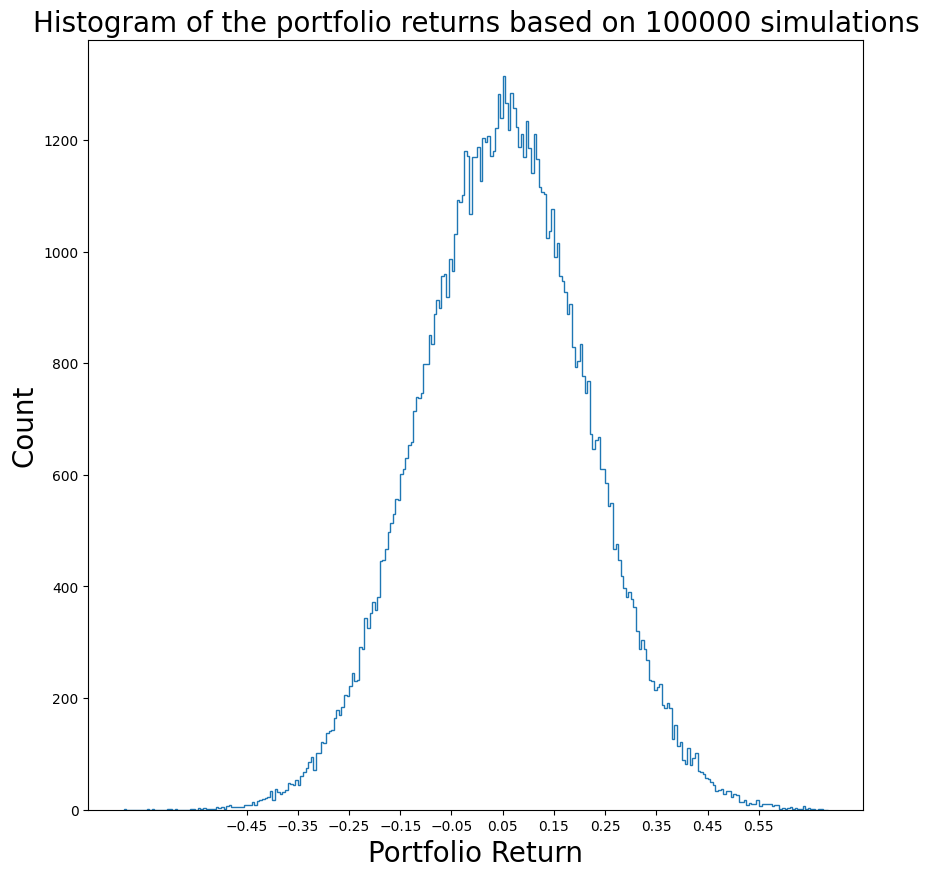

In [ ]:
#plot the histogram of the portfolio returns.
fig, ax =plt.subplots(figsize = (10, 10))
step = int(abs(min(Simulated_Portfolio_Return))*2/0.005+1)
bins = [min(Simulated_Portfolio_Return)+0.005*i for i in range(step)]
ax.hist(Simulated_Portfolio_Return, bins, histtype = 'step')
#ax.hist(Simulated_Payoff*2, bins, histtype = 'step')
title='Histogram of the portfolio returns based on '+str(n_scene)+' simulations'
ax.set_title(title, fontsize = 20)
ax.set_xlabel('Portfolio Return', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
plt.xticks([Portfolio_Return.value+0.1*i for i in range(-5,6)])

# STEP 8: Efficient frontier

In [ ]:
X = cp.Variable(len(mu))
#define the list of required return from 0.03 to 0.08
R_list = np.arange(0.03,0.08+0.001,0.001)
Portfolio_Risk = cp.quad_form(X,Sigma)
Portfolio_Return = X.T@mu
Objective = cp.Minimize(Portfolio_Risk)
SD_Short = []
for R in R_list:
    Constraints = [Portfolio_Return >= R, sum(X)==1]
    cp.Problem(Objective, Constraints).solve()
    SD_Short.append(cp.sqrt(Portfolio_Risk).value.tolist())

In [ ]:
#put the required returns and the minimum SDs obtained with optimal portfolios in a table
Efficient_Frontier_Table = pd.DataFrame({'Required Return':R_list, 'Minimum SD':np.array(SD_Short)})

In [ ]:
#plot the efficient frontier
fig = px.line(Efficient_Frontier_Table, x = 'Minimum SD', y = 'Required Return')
fig.update_layout(title = 'The efficient frontier')
fig.show()

# Backtesting

In [ ]:
def Log_return(Price_dataframe):
    """Compute the log return from an asset price dataframe.

    Args:
        Price_dataframe (DataFrame): Column: ticker name, Index: date

    Returns:
        DataFrame: Log_return_dataframe
    """
    # Create a shifted DataFrame by shifting Price_dataframe by one period
    dummy = Price_dataframe.shift(periods=1).T

    # Set the first column of the shifted DataFrame to the first row of Price_dataframe
    dummy[Price_dataframe.index[0]] = Price_dataframe.iloc[0].tolist()

    # Create a DataFrame for log returns by taking the natural logarithm of the ratio
    # of Price_dataframe to the shifted DataFrame (to calculate daily log returns)
    return pd.DataFrame(
        np.log(Price_dataframe.values.T / dummy.values),
        columns=Price_dataframe.index.tolist(),
        index=Price_dataframe.columns.tolist()
    ).T

def Mean_Cov(Log_return_dataframe, shifting_day):
    """Compute the Mean and Covariance of each asset.

    Args:
        Log_return_dataframe (DataFrame): Column: ticker name, Index: date
        shifting_day (int): The number of days to shift.

    Returns:
        (Mean, Cov): Mean list, Covariance matrix
    """
    # Compute the mean of log returns for each asset and multiply by the shifting days
    Mean = np.asarray(np.mean(Log_return_dataframe.values.T, axis=1)) * shifting_day

    # Compute the covariance matrix of log returns and multiply by the shifting days
    Cov = np.asmatrix(np.cov(Log_return_dataframe.values.T)) * shifting_day

    return Mean, Cov

def Backtesting_Mean_Variance(len_of_trianing_data, trading_day, period, number_of_trading, require_return, Close_price_dataframe, short_sell = None):
    """
    Backtest a Mean-Variance portfolio strategy over multiple trading periods.

    Args:
        len_of_trianing_data (int): Length of the training data period (in months).
        trading_day (datetime): Initial trading day to start the backtesting.
        period (int): Number of months for each trading period.
        number_of_trading (int): Number of trading periods to backtest.
        require_return (float): Required return for the portfolio in each trading period.
        Close_price_dataframe (DataFrame): DataFrame with close prices for each trading day.

    Returns:
        dict, dict: Returns and portfolio proportions for each trading period.
    """
    trading_day = checking_day_trade(trading_day, Close_price_dataframe)
    start_dict = dict()
    end_dict = dict()
    trianing_data = dict()
    day_trading = dict()
    Mean_dict = dict()
    Cov_dict = dict()
    portfolio_proportions_dict = dict()

    # Loop through each trading period for backtesting
    for i in range(number_of_trading + 1):
        start_dict[i] = (trading_day - len_of_trianing_data * timedelta(days=30)).date()
        end_dict[i] = (trading_day - timedelta(days=1)).date()
        trianing_data[i] = Close_price_dataframe.loc[start_dict[i]:end_dict[i]]
        day_trading[i] = trading_day
        Mean_dict[i], Cov_dict[i] = Mean_Cov(Log_return(trianing_data[i]), period * 30)
        #print(Log_return(trianing_data[i]))
        portfolio_proportions_dict[i], __, __ = Mean_Variance_optimization(Mean_dict[i], Cov_dict[i], require_return, short_sell=short_sell)

        trading_day = checking_day_trade(trading_day + timedelta(days=30 * period), Close_price_dataframe)

    R = dict()
    # Calculate returns for each trading period
    for i in range(number_of_trading):
        #print(Close_price_dataframe.loc[day_trading[i + 1]])
        R[i + 1] = sum(portfolio_proportions_dict[i] * np.log(np.array(Close_price_dataframe.loc[day_trading[i + 1]].tolist()) /
                                                       np.array(Close_price_dataframe.loc[day_trading[i]].tolist())))

    return R, portfolio_proportions_dict, day_trading

def checking_day_trade(Date, Close_price_dataframe):
    """
    Check if the given date is a trading day. If not, find the next trading day.

    Args:
        Date (datetime): The input date to check.
        Close_price_dataframe (DataFrame): DataFrame with trading day indices.

    Returns:
        datetime: The next trading day date.
    """
    # Continue searching for the next trading day until a trading day is found
    while not (Date in Close_price_dataframe.index):
        # Increment the date by one day
        #print(Date)
        Date = Date + timedelta(days=1)

    # Return the next trading day date
    return Date

def Mean_Variance_optimization(return_array, covariance_matrix, require_return, short_sell=None):
    """
    Optimize the portfolio for mean-variance using convex optimization.

    Args:
        return_array (array): Array of expected returns for each asset.
        covariance_matrix (array): Covariance matrix of asset returns.
        require_return (float): Required return for the portfolio.
        short_sell (str, optional): If short selling is allowed, input 'yes'. Defaults to None.

    Returns:
        tuple: Portfolio weights, objective value, and portfolio return.
    """
    # Define the decision variable for portfolio weights
    X = cp.Variable(len(return_array))
    #print(covariance_matrix)
    # Formulate the objective function as the quadratic form of portfolio weights and covariance matrix
    objective_formulation = cp.quad_form(X, covariance_matrix)

    # Define the objective function to minimize the variance
    objective_function = cp.Minimize(objective_formulation)

    # Calculate the expected return of the portfolio
    Return = return_array.T @ X

    # Define constraints based on the specified conditions (short selling or not)
    if short_sell == None:

        constraints = [sum(X) == 1, Return >= require_return, X >= 0]
    else:

        constraints = [sum(X) == 1, Return >= require_return]

    # Formulate the convex optimization problem
    problem = cp.Problem(objective_function, constraints)

    # Solve the optimization problem
    problem.solve()

    if problem.status != 'optimal':

        optimal_portfolio = np.array([0 for i in range(len(return_array))])

    else:

        optimal_portfolio = X.value

    # Return the optimized portfolio weights, objective value (variance), and the expected return of the portfolio
    return optimal_portfolio, problem.value, Return.value

In [ ]:
Close_price_dataframe = thai_df['Adj Close']

In [ ]:
# input variable
len_of_trianing_data = 48 # unit: mouth
trading_day = datetime(2022, 1, 4) # datetime format
period = 1 # unit: mouth
number_of_trading = 11 # nunit : mouth
require_return = [0.03/12,0.4/12,0.6/12] # 1%
#require_return = [0.01] # 1%

In [ ]:
Return, portfolio_proportions, day_trading = dict(), dict(), dict()

for i in require_return:

    Return[i], portfolio_proportions[i], day_trading[i] = Backtesting_Mean_Variance(len_of_trianing_data, trading_day, period, number_of_trading, i, Close_price_dataframe, short_sell = None)

In [ ]:
size = 0.01
rr_0_01 = np.array(list(Return[require_return[0]].values()))
rr_0_05 = np.array(list(Return[require_return[1]].values()))
rr_0_1 = np.array(list(Return[require_return[2]].values()))

# Create a histogram using Plotly (go.Histogram) for the optimal portfolio payoffs
hist = go.Figure(data=[go.Histogram(x=rr_0_01, xbins=dict(
    start=min(rr_0_01) // size * size,  # type: ignore
    end=max(rr_0_01) // size * size + size,  # type: ignore
    size=size
), name='Require Return is %.2f' % require_return[0])])

# Update layout settings for the histogram
hist.update_layout(
    # title_text='Portfolios payoffs with mean of return are %f' % np.mean(rr_0_01),  # title of plot
    xaxis_title_text='Return',  # x-axis label
    yaxis_title_text='Count',  # y-axis label
    bargroupgap=0.1  # gap between bars of the same location coordinates
)

# Add a histogram for the random portfolio payoffs
hist.add_trace(go.Histogram(x=rr_0_05, xbins=dict(
    start=min(rr_0_05) // size * size,  # type: ignore
    end=max(rr_0_05) // size * size + size,  # type: ignore
    size=size
), name='Require Return is %.2f' % require_return[1]))

# Add a histogram for the random portfolio payoffs
hist.add_trace(go.Histogram(x=rr_0_1, xbins=dict(
    start=min(rr_0_1) // size * size,  # type: ignore
    end=max(rr_0_1) // size * size + size,  # type: ignore
    size=size
), name='Require Return is %.2f' % require_return[2]))


# The two histograms are drawn on top of one another
hist.update_layout(barmode='overlay')
hist.update_traces(opacity=0.5)

# Show the overlaid histogram
hist.show()

In [ ]:
W = 100000
rr_0_01 = np.exp(rr_0_01)
rr_0_05 = np.exp(rr_0_05)
rr_0_1 = np.exp(rr_0_1)

W_invest_0_01 = [W]+[W*np.prod(rr_0_01[0:i]) for i in range(1,len(rr_0_01)+1)]
W_invest_0_05 = [W]+[W*np.prod(rr_0_05[0:i]) for i in range(1,len(rr_0_05)+1)]
W_invest_0_1 = [W]+[W*np.prod(rr_0_1[0:i]) for i in range(1,len(rr_0_1)+1)]

fig = go.Figure(data=go.Scatter(x=list(day_trading[require_return[0]].values()), y=W_invest_0_01,name='Require Return is %.2f' % require_return[0]))
fig.add_trace(go.Scatter(x=list(day_trading[require_return[1]].values()), y=W_invest_0_05, name='Require Return is %.2f' % require_return[1]))
fig.add_trace(go.Scatter(x=list(day_trading[require_return[2]].values()), y=W_invest_0_1, name='Require Return is %.2f' % require_return[2]))

fig.update_layout(
    title_text='Return of each require return', # title of plot
    xaxis_title_text='Day trade', # xaxis label
    yaxis_title_text='Wealth', # yaxis label
)


fig.show()